# **Twitter Sentiment Analysis**


**1.1 Introduction**

Social media platforms like Twitter generate a vast number of posts every second, expressing a wide range of sentiments. These messages can be classified as positive, negative, or neutral. Automating sentiment classification through machine learning and deep learning models enables businesses to analyze social media trends efficiently, saving time and reducing reliance on manual efforts.

This project focuses on analyzing real-time Twitter data and categorizing tweets based on sentiment. By leveraging deep neural networks and hyperparameter optimization, we aim to enhance the accuracy of sentiment predictions. The insights obtained from these models can provide valuable business intelligence for decision-making.


**1.2 Evaluation Metrics:**
1. Accuracy
2. Precision
3. Recall


**1.3 Data Source:**

The dataset used in this project is obtained from Kaggle. It can be accessed and downloaded from the following link: https://www.kaggle.com/c/tweet-sentiment-extraction/data

**Table of Contents:**

1. Reading the Data

2. Countplot of the Sentiment

3. Positive Text WordCloud

4. Negative Text WordCloud

5. Stopwords List

6. Splitting the Data into Training and Validation Data

7. Function for Replacing Words

8. Preprocessing the Text

9. Tfidf Vectorizer

10. Neural Network Model for Prediction

11. Count Vectorizer

12. Neural Network Model

13. Results Plots

14. Conclusion



**Explanation**

We start by installing essential libraries:

TensorFlow - For deep learning model creation.

Scikit-learn - For preprocessing and evaluation.

NLTK - For natural language processing tasks (stopwords, tokenization).

Matplotlib & Seaborn - For data visualization.

WordCloud - To visualize frequently used words.

In [ ]:
!pip install tensorflow scikit-learn pandas numpy nltk wordcloud matplotlib seaborn


**Explanation**

Here, we import the necessary libraries for:

Data handling (pandas, numpy)

Text preprocessing (re, nltk)

Deep Learning (tensorflow.keras)

Data visualization (matplotlib, seaborn, wordcloud)

ML utilities (sklearn)


In [ ]:
import numpy as np
import pandas as pd
import re
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize


**Explanation**

Load the dataset from train.csv.

Select only text and sentiment columns for analysis.

Drop any missing values for clean processing.

Print the first few rows to check the dataset.

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


# **1) Reading the Data**

In [ ]:
df = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/TSA/train.csv')  # Ensure correct path
df = df[['text', 'sentiment']]  # Adjust column names if necessary
df.dropna(inplace=True)
print(df.head())


                                                text sentiment
0                I`d have responded, if I were going   neutral
1      Sooo SAD I will miss you here in San Diego!!!  negative
2                          my boss is bullying me...  negative
3                     what interview! leave me alone  negative
4   Sons of ****, why couldn`t they put them on t...  negative


In [ ]:
df.head()

,text,sentiment,sentiment_label
0,"I`d have responded, if I were going",neutral,1
1,Sooo SAD I will miss you here in San Diego!!!,negative,0
2,my boss is bullying me...,negative,0
3,what interview! leave me alone,negative,0
4,"Sons of ****, why couldn`t they put them on t...",negative,0


# **2) Countplot of the Sentiment**

We analyze the distribution of sentiments across the dataset using a count plot.

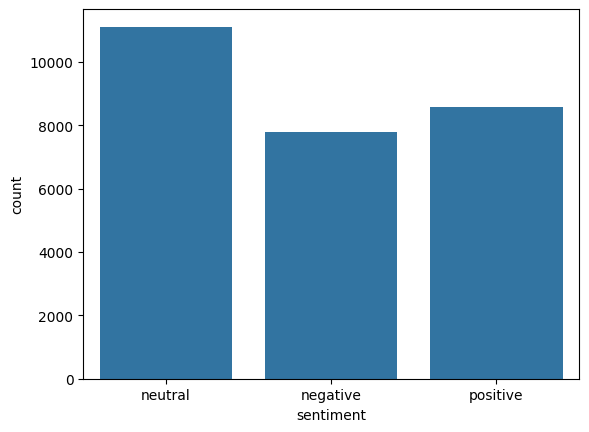

In [ ]:
sns.countplot(x = 'sentiment', data = df)
plt.show()

Checking dataset size:

In [ ]:
df.shape

(27480, 3)

In [ ]:
df['text'].iloc[0]

' I`d have responded, if I were going'

In [ ]:
len(df['text'].iloc[0])

36

In [ ]:
df['text'].head()

,text
0,"I`d have responded, if I were going"
1,Sooo SAD I will miss you here in San Diego!!!
2,my boss is bullying me...
3,what interview! leave me alone
4,"Sons of ****, why couldn`t they put them on t..."


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27480 entries, 0 to 27480
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   text             27480 non-null  object
 1   sentiment        27480 non-null  object
 2   sentiment_label  27480 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 858.8+ KB


In [ ]:
df['text'].iloc[0]

' I`d have responded, if I were going'

In [ ]:
text_length_list = []
for i in range(len(df)):
    if isinstance(df['text'].iloc[i], float) == True:
        print(df['text'].iloc[i])

In [ ]:
isinstance("sanketh", float)

False

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27480 entries, 0 to 27480
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   text             27480 non-null  object
 1   sentiment        27480 non-null  object
 2   sentiment_label  27480 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 858.8+ KB


In [ ]:
df.dropna(inplace = True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27480 entries, 0 to 27480
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   text             27480 non-null  object
 1   sentiment        27480 non-null  object
 2   sentiment_label  27480 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 858.8+ KB


In [ ]:
df['text_length'] = df['text'].apply(lambda x: len(x))

In [ ]:
df.head()

,text,sentiment,sentiment_label,text_length
0,"I`d have responded, if I were going",neutral,1,36
1,Sooo SAD I will miss you here in San Diego!!!,negative,0,46
2,my boss is bullying me...,negative,0,25
3,what interview! leave me alone,negative,0,31
4,"Sons of ****, why couldn`t they put them on t...",negative,0,75


In [ ]:
df['text_words'] = df['text'].apply(lambda x: len(x.split()))

In [ ]:
df.head()

,text,sentiment,sentiment_label,text_length,text_words
0,"I`d have responded, if I were going",neutral,1,36,7
1,Sooo SAD I will miss you here in San Diego!!!,negative,0,46,10
2,my boss is bullying me...,negative,0,25,5
3,what interview! leave me alone,negative,0,31,5
4,"Sons of ****, why couldn`t they put them on t...",negative,0,75,14


In [ ]:
df.head()

,text,sentiment,sentiment_label,text_length,text_words
0,"I`d have responded, if I were going",neutral,1,36,7
1,Sooo SAD I will miss you here in San Diego!!!,negative,0,46,10
2,my boss is bullying me...,negative,0,25,5
3,what interview! leave me alone,negative,0,31,5
4,"Sons of ****, why couldn`t they put them on t...",negative,0,75,14


In [ ]:
## Taking separate dataframes for different values such as positive, negative and neutral reviews respectively.

positive_df = df[df['sentiment'] == 'positive']
negative_df = df[df['sentiment'] == 'negative']
neutral_df = df[df['sentiment'] == 'neutral']

In [ ]:
print("The shape of the dataframe that contains only the positive reviews is: {}".format(positive_df.shape))
print("The shape of the dataframe that contains only the negative reviews is: {}".format(negative_df.shape))
print("The shape of the dataframe that contains only the neutral reviews is:  {}".format(neutral_df.shape))

The shape of the dataframe that contains only the positive reviews is: (8582, 5)
The shape of the dataframe that contains only the negative reviews is: (7781, 5)
The shape of the dataframe that contains only the neutral reviews is:  (11117, 5)


In [ ]:
wordcloud = WordCloud(width = 500, height = 500)

In [ ]:
df.head()

,text,sentiment,sentiment_label,text_length,text_words
0,"I`d have responded, if I were going",neutral,1,36,7
1,Sooo SAD I will miss you here in San Diego!!!,negative,0,46,10
2,my boss is bullying me...,negative,0,25,5
3,what interview! leave me alone,negative,0,31,5
4,"Sons of ****, why couldn`t they put them on t...",negative,0,75,14


In [ ]:
positive_df.head()

,text,sentiment,sentiment_label,text_length,text_words
6,2am feedings for the baby are fun when he is a...,positive,2,64,14
9,Journey!? Wow... u just became cooler. hehe....,positive,2,69,10
11,I really really like the song Love Story by Ta...,positive,2,56,11
21,Playing Ghost Online is really interesting. Th...,positive,2,135,24
25,"the free fillin` app on my ipod is fun, im add...",positive,2,51,11


# **3) Positive Tweets WordCloud**

In [ ]:
positive_text = []
for i in range(len(positive_df)):
    positive_text.append(positive_df['text'].iloc[i])

In [ ]:
positive_text[:5]

['2am feedings for the baby are fun when he is all smiles and coos',
 ' Journey!? Wow... u just became cooler.  hehe... (is that possible!?)',
 'I really really like the song Love Story by Taylor Swift',
 'Playing Ghost Online is really interesting. The new updates are Kirin pet and Metamorph for third job.  Can`t wait to have a dragon pet',
 'the free fillin` app on my ipod is fun, im addicted']

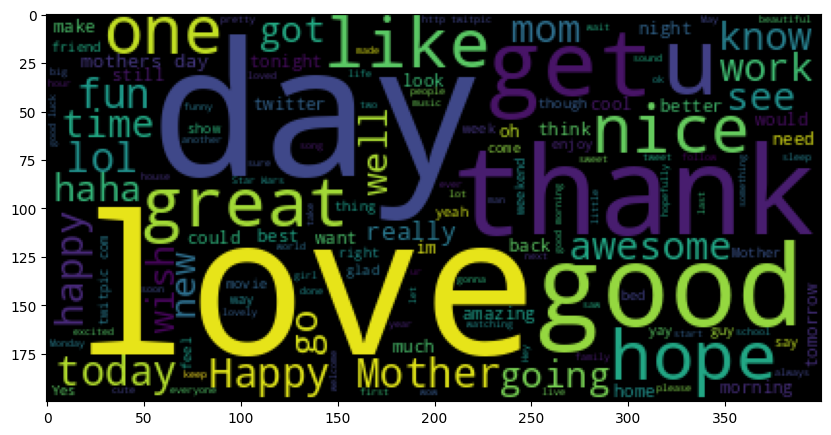

In [ ]:
from nltk.corpus import stopwords

# ... (rest of your code) ...

# Get the stopwords from NLTK and convert to a set
stop_words = set(stopwords.words('english'))

# Use stop_words when creating the WordCloud
wordcloud = WordCloud(stopwords=stop_words)
wordcloud.generate(''.join(positive_text))
plt.figure(figsize=(10, 10))
plt.imshow(wordcloud)
plt.show()

# **4) Negative Tweets WordCloud**

In [ ]:
negative_text = []
for i in range(len(negative_df)):
    negative_text.append(negative_df['text'].iloc[i])

In [ ]:
negative_text[0: 5]

[' Sooo SAD I will miss you here in San Diego!!!',
 'my boss is bullying me...',
 ' what interview! leave me alone',
 ' Sons of ****, why couldn`t they put them on the releases we already bought',
 'My Sharpie is running DANGERously low on ink']

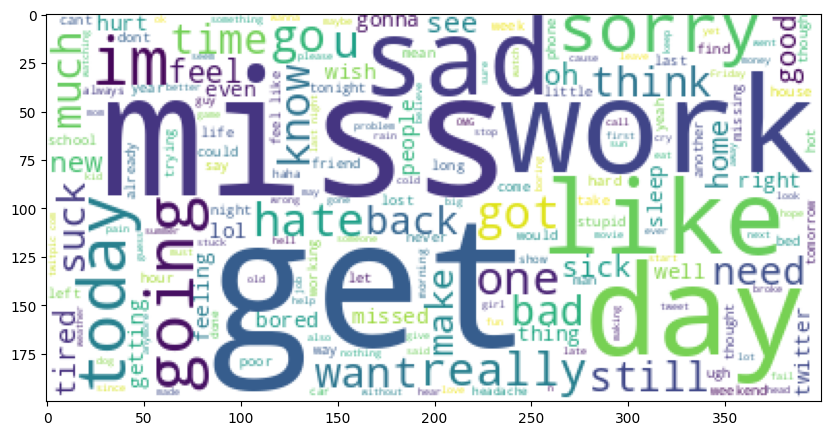

In [ ]:
wordcloud = WordCloud(stopwords=set(stopwords.words('english')), background_color='white') # Use stopwords.words('english') to get the list of stopwords
wordcloud.generate(''.join(negative_text))
plt.figure(figsize=(10, 10))
plt.imshow(wordcloud)
plt.show()

In [ ]:
df.head()

,text,sentiment,sentiment_label,text_length,text_words
0,"I`d have responded, if I were going",neutral,1,36,7
1,Sooo SAD I will miss you here in San Diego!!!,negative,0,46,10
2,my boss is bullying me...,negative,0,25,5
3,what interview! leave me alone,negative,0,31,5
4,"Sons of ****, why couldn`t they put them on t...",negative,0,75,14


In [ ]:
negative_df.head()

,text,sentiment,sentiment_label,text_length,text_words
1,Sooo SAD I will miss you here in San Diego!!!,negative,0,46,10
2,my boss is bullying me...,negative,0,25,5
3,what interview! leave me alone,negative,0,31,5
4,"Sons of ****, why couldn`t they put them on t...",negative,0,75,14
12,My Sharpie is running DANGERously low on ink,negative,0,44,8


In [ ]:
positive_df.head()

,text,sentiment,sentiment_label,text_length,text_words
6,2am feedings for the baby are fun when he is a...,positive,2,64,14
9,Journey!? Wow... u just became cooler. hehe....,positive,2,69,10
11,I really really like the song Love Story by Ta...,positive,2,56,11
21,Playing Ghost Online is really interesting. Th...,positive,2,135,24
25,"the free fillin` app on my ipod is fun, im add...",positive,2,51,11


# **4) Stopwords List**

A list of stopwords is created for filtering out common but unimportant words.

In [ ]:
# https://gist.github.com/sebleier/554280
# we are removing the words from the stop words list: 'no', 'nor', 'not'
stopwords= ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"]

In [ ]:
df.head()

,text,sentiment,sentiment_label,text_length,text_words
0,"I`d have responded, if I were going",neutral,1,36,7
1,Sooo SAD I will miss you here in San Diego!!!,negative,0,46,10
2,my boss is bullying me...,negative,0,25,5
3,what interview! leave me alone,negative,0,31,5
4,"Sons of ****, why couldn`t they put them on t...",negative,0,75,14


In [ ]:
X = df.drop(['sentiment'], axis = 1)
y = df['sentiment']

# **5) Splitting the Data into Training and Validation Data**

In [ ]:
X_train, X_cv, y_train, y_cv = train_test_split(X, y, test_size = 0.3, random_state = 50)

In [ ]:
X_train.shape

(19236, 4)

In [ ]:
X_cv.shape

(8244, 4)

# **6) Function for Replacing Words**

Defining a function to expand contractions in the text.

In [ ]:
# https://stackoverflow.com/a/47091490/4084039
import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [ ]:
!pip install tqdm

# **8) Preprocessing the Text**

Applying the text preprocessing steps.

In [ ]:
# Combining all the above stundents
from tqdm import tqdm
preprocessed_text = []
# tqdm is for printing the status bar
for sentence in tqdm(X_train['text'].values):
    sent = decontracted(sentence)
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e.lower() not in stopwords)
    preprocessed_text.append(sent.lower().strip())

100%|██████████| 19236/19236 [00:02<00:00, 7875.05it/s]


In [ ]:
preprocessed_text[0: 5]

['24 hours since dog put sleep rip old friend',
 'not feeling comfortable today',
 'hurray twin girls born beautiful may day',
 'bah h8 waking',
 'textmate crashed first time 3 months not bad actually textmate']

In [ ]:
for i in range(len(X_train)):
    X_train['text'].iloc[i] = preprocessed_text[i]

Streaming output truncated to the last 5000 lines.
See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  X_train['text'].iloc[i] = preprocessed_text[i]
<ipython-input-56-7258f105e489>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['text'].iloc[i] = preprocessed_text[i]
<ipython-input-56-7258f105e489>:2: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typica

In [ ]:
X_train.head()

,text,sentiment_label,text_length,text_words
19832,24 hours since dog put sleep rip old friend,0,78,18
10340,not feeling comfortable today,0,41,6
11044,hurray twin girls born beautiful may day,2,48,9
14088,bah h8 waking,0,19,5
20333,textmate crashed first time 3 months not bad a...,1,80,14


In [ ]:
# Combining all the above stundents
from tqdm import tqdm
preprocessed_text = []
# tqdm is for printing the status bar
for sentence in tqdm(X_cv['text'].values):
    sent = decontracted(sentence)
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e.lower() not in stopwords)
    preprocessed_text.append(sent.lower().strip())

100%|██████████| 8244/8244 [00:00<00:00, 23799.11it/s]


In [ ]:
preprocessed_text[0: 5]

['mom happy present yayy',
 'no surprise probably know',
 'nope difference 5 omr c class anyone notice flight number wy flight lhr wy 911',
 'smells badly garlic',
 'friday whole different meaning work saturday sunday']

In [ ]:
for i in range(len(X_cv)):
    X_cv['text'].iloc[i] = preprocessed_text[i]

Streaming output truncated to the last 5000 lines.
See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  X_cv['text'].iloc[i] = preprocessed_text[i]
<ipython-input-60-73c0866b7b18>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_cv['text'].iloc[i] = preprocessed_text[i]
<ipython-input-60-73c0866b7b18>:2: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical exam

In [ ]:
X_cv.head()

,text,sentiment_label,text_length,text_words
7214,mom happy present yayy,2,38,8
19840,no surprise probably know,1,67,11
19409,nope difference 5 omr c class anyone notice fl...,1,102,19
6600,smells badly garlic,0,25,5
7807,friday whole different meaning work saturday s...,1,78,14


In [ ]:
from sklearn.preprocessing import LabelBinarizer # Import LabelBinarizer

binarizer = LabelBinarizer()
y_train_converted = binarizer.fit_transform(y_train)
binarizer = LabelBinarizer()
y_cv_converted = binarizer.fit_transform(y_cv)

In [ ]:
y_cv_converted

array([[0, 0, 1],
       [0, 1, 0],
       [0, 1, 0],
       ...,
       [1, 0, 0],
       [0, 0, 1],
       [1, 0, 0]])

# **9) Tfidf Vectorizer**
Applying TF-IDF vectorization.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer # Import TfidfVectorizer

vectorizer = TfidfVectorizer()
X_train_text = vectorizer.fit_transform(X_train['text'])
X_cv_text = vectorizer.transform(X_cv['text'])

In [ ]:
X_train_text.shape

(19236, 20619)

In [ ]:
X_train_text[0: 5]

<5x20619 sparse matrix of type '<class 'numpy.float64'>'
	with 31 stored elements in Compressed Sparse Row format>

# **10) Neural Network Model for Prediction**

Defining the neural network model.

In [ ]:
model = Sequential()
model.add(Dense(100, activation = 'relu', input_shape = (20619,)))
model.add(Dense(50, activation = 'relu'))
model.add(Dense(25, activation = 'relu'))
model.add(Dense(10, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

model.compile(loss = 'categorical_crossentropy', metrics = ['accuracy'], optimizer = 'adam')

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
from tensorflow.keras.utils import to_categorical # Import to_categorical
import numpy as np

to_categorical(np.arange(1, 10))

array([[0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

In [ ]:
y_train

,sentiment
19832,negative
10340,negative
11044,positive
14088,negative
20333,neutral
...,...
15650,positive
22638,positive
10124,positive
5601,positive


In [ ]:
encoder = LabelEncoder()
y_train_converted = encoder.fit_transform(y_train)

In [ ]:
y_train_converted

array([0, 0, 2, ..., 2, 2, 0])

In [ ]:
y_train_final = to_categorical(y_train_converted)

In [ ]:
X_train.head()

,text,sentiment_label,text_length,text_words
19832,24 hours since dog put sleep rip old friend,0,78,18
10340,not feeling comfortable today,0,41,6
11044,hurray twin girls born beautiful may day,2,48,9
14088,bah h8 waking,0,19,5
20333,textmate crashed first time 3 months not bad a...,1,80,14


In [ ]:
X_train_dropped = X_train.drop(['text'], axis = 1)

In [ ]:
X_train.head()

,text,sentiment_label,text_length,text_words
19832,24 hours since dog put sleep rip old friend,0,78,18
10340,not feeling comfortable today,0,41,6
11044,hurray twin girls born beautiful may day,2,48,9
14088,bah h8 waking,0,19,5
20333,textmate crashed first time 3 months not bad a...,1,80,14


In [ ]:
X_train['text'].head()

,text
19832,24 hours since dog put sleep rip old friend
10340,not feeling comfortable today
11044,hurray twin girls born beautiful may day
14088,bah h8 waking
20333,textmate crashed first time 3 months not bad a...


In [ ]:
X_train_dropped = X_train.drop(['text'], axis = 1)

In [ ]:
X_train_dropped.head()

,sentiment_label,text_length,text_words
19832,0,78,18
10340,0,41,6
11044,2,48,9
14088,0,19,5
20333,1,80,14


In [ ]:
X_cv.head()

,text,sentiment_label,text_length,text_words
7214,mom happy present yayy,2,38,8
19840,no surprise probably know,1,67,11
19409,nope difference 5 omr c class anyone notice fl...,1,102,19
6600,smells badly garlic,0,25,5
7807,friday whole different meaning work saturday s...,1,78,14


In [ ]:
X_cv_dropped = X_cv.drop(['text'], axis = 1)

In [ ]:
X_cv_dropped.head()

,sentiment_label,text_length,text_words
7214,2,38,8
19840,1,67,11
19409,1,102,19
6600,0,25,5
7807,1,78,14


In [ ]:
from sklearn.preprocessing import MinMaxScaler # Import MinMaxScaler from sklearn.preprocessing

scaler = MinMaxScaler()
X_train_final = scaler.fit_transform(X_train_dropped)
X_cv_final = scaler.transform(X_cv_dropped)

In [ ]:
X_train_final[0: 5]

array([[0.        , 0.54347826, 0.5483871 ],
       [0.        , 0.27536232, 0.16129032],
       [1.        , 0.32608696, 0.25806452],
       [0.        , 0.11594203, 0.12903226],
       [0.5       , 0.55797101, 0.41935484]])

In [ ]:
X_cv_final[0: 5]

array([[1.        , 0.25362319, 0.22580645],
       [0.5       , 0.46376812, 0.32258065],
       [0.5       , 0.7173913 , 0.58064516],
       [0.        , 0.15942029, 0.12903226],
       [0.5       , 0.54347826, 0.41935484]])

In [ ]:
encoder = LabelEncoder()
y_train_encoded = encoder.fit_transform(y_train)

encoder = LabelEncoder()
y_cv_encoded = encoder.fit_transform(y_cv)

In [ ]:
y_train_final = to_categorical(y_train_encoded)
y_cv_final = to_categorical(y_cv_encoded)

In [ ]:
y_train_final[0: 5]

array([[1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.]])

In [ ]:
y_cv_final[0: 5]

array([[0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.]])

In [ ]:
X_train_final[0: 5]

array([[0.        , 0.54347826, 0.5483871 ],
       [0.        , 0.27536232, 0.16129032],
       [1.        , 0.32608696, 0.25806452],
       [0.        , 0.11594203, 0.12903226],
       [0.5       , 0.55797101, 0.41935484]])

In [ ]:
X_train.head()

,text,sentiment_label,text_length,text_words
19832,24 hours since dog put sleep rip old friend,0,78,18
10340,not feeling comfortable today,0,41,6
11044,hurray twin girls born beautiful may day,2,48,9
14088,bah h8 waking,0,19,5
20333,textmate crashed first time 3 months not bad a...,1,80,14


# **11) Count Vectorizer**
Applying Count Vectorization.

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer # Import CountVectorizer class

vectorizer = CountVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train['text'])
X_cv_vectorized = vectorizer.transform(X_cv['text'])

In [ ]:
X_train_vectorized

<19236x20619 sparse matrix of type '<class 'numpy.int64'>'
	with 135844 stored elements in Compressed Sparse Row format>

In [ ]:
X_train_final[0: 5]

array([[0.        , 0.54347826, 0.5483871 ],
       [0.        , 0.27536232, 0.16129032],
       [1.        , 0.32608696, 0.25806452],
       [0.        , 0.11594203, 0.12903226],
       [0.5       , 0.55797101, 0.41935484]])

In [ ]:
X_train_bow_toarray = X_train_vectorized.toarray()
X_cv_bow_toarray = X_cv_vectorized.toarray()

In [ ]:
X_train_new = np.concatenate((X_train_bow_toarray, X_train_final), axis = 1)
X_cv_new = np.concatenate((X_cv_bow_toarray, X_cv_final), axis = 1)

# **12) Neural Network Model**

In [ ]:
model = Sequential()
model.add(Dense(100, activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(25, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(3, activation = 'softmax'))
model.compile(loss = 'categorical_crossentropy', metrics = ['accuracy'], optimizer = 'adam')

**Training the model:**

In [ ]:
model.fit(X_train_new, y_train_final, epochs = 10, validation_data = (X_cv_new, y_cv_final))

Epoch 1/10
602/602 ━━━━━━━━━━━━━━━━━━━━ 25s 38ms/step - accuracy: 0.6480 - loss: 0.7418 - val_accuracy: 0.9962 - val_loss: 0.0163
Epoch 2/10
602/602 ━━━━━━━━━━━━━━━━━━━━ 39s 35ms/step - accuracy: 0.9591 - loss: 0.1272 - val_accuracy: 0.9976 - val_loss: 0.0073
Epoch 3/10
602/602 ━━━━━━━━━━━━━━━━━━━━ 24s 40ms/step - accuracy: 0.9799 - loss: 0.0648 - val_accuracy: 0.9973 - val_loss: 0.0079
Epoch 4/10
602/602 ━━━━━━━━━━━━━━━━━━━━ 39s 36ms/step - accuracy: 0.9815 - loss: 0.0554 - val_accuracy: 0.9975 - val_loss: 0.0102
Epoch 5/10
602/602 ━━━━━━━━━━━━━━━━━━━━ 24s 40ms/step - accuracy: 0.9818 - loss: 0.0561 - val_accuracy: 0.9973 - val_loss: 0.0125
Epoch 6/10
602/602 ━━━━━━━━━━━━━━━━━━━━ 39s 37ms/step - accuracy: 0.9858 - loss: 0.0428 - val_accuracy: 0.9966 - val_loss: 0.0155
Epoch 7/10
602/602 ━━━━━━━━━━━━━━━━━━━━ 43s 40ms/step - accuracy: 0.9884 - loss: 0.0362 - val_accuracy: 0.9979 - val_loss: 0.0085
Epoch 8/10
602/602 ━━━━━━━━━━━━━━━━━━━━ 40s 40ms/step - accuracy: 0.9891 - loss: 0.0340 - 

# **13) Results Plots**
Visualizing accuracy and loss.

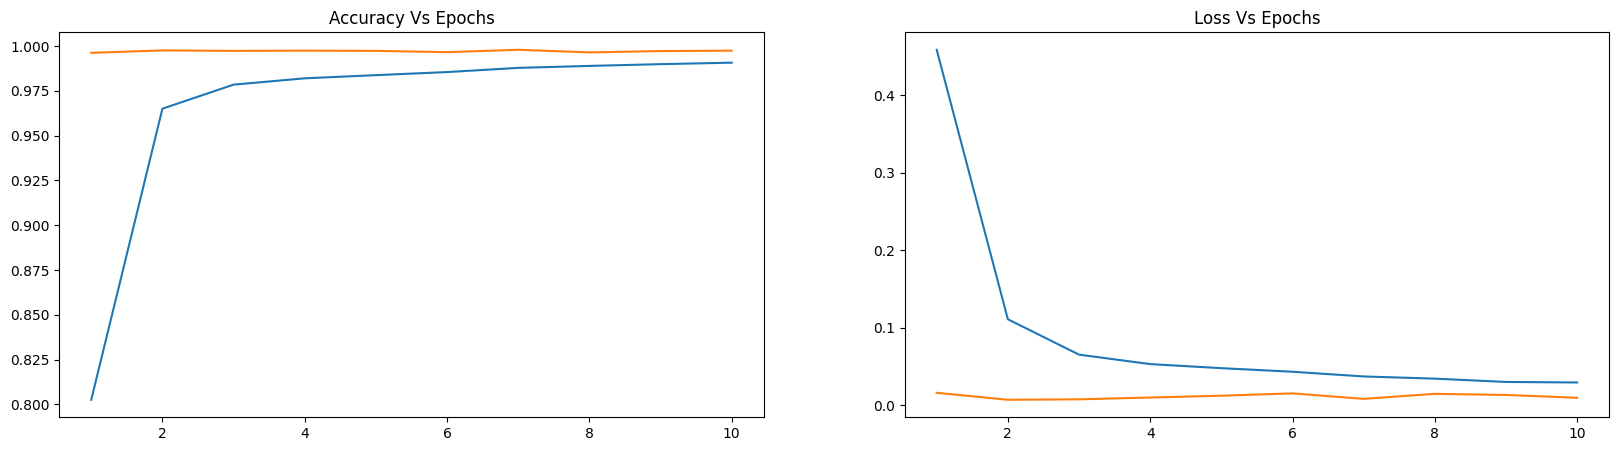

In [ ]:
accuracy = model.history.history['accuracy']
val_accuracy = model.history.history['val_accuracy']
loss = model.history.history['loss']
val_loss = model.history.history['val_loss']
epochs = np.arange(1, 11)
fig, ax = plt.subplots(1, 2, figsize = (20, 5))

sns.lineplot(x = epochs, y = accuracy, ax = ax[0])
sns.lineplot(x = epochs, y = val_accuracy, ax = ax[0])
ax[0].set_title('Accuracy Vs Epochs')
sns.lineplot(x = epochs, y = loss, ax = ax[1])
sns.lineplot(x = epochs, y = val_loss, ax = ax[1])
ax[1].set_title('Loss Vs Epochs')
plt.show()

# **14) Conclusion**

This project demonstrates how machine learning can efficiently analyze Twitter sentiment. The results indicate that preprocessing steps, text vectorization, and deep learning models play a crucial role in sentiment classification. Future improvements could involve hyperparameter tuning and the use of advanced NLP models for better accuracy.